# Первичная обработка данных. Подготовка датасета

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Предобработка результатов (серия 2)

In [2]:
# Загружаем данные из файла xls, 
# Берем данные из третьей вкладки, пропуская первые 3 строки, берем первые 2 столбца
df = pd.read_excel(r"/Users/aljosha/RAWdata/2_1_2__13.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')

In [3]:
# Назовем столбцы L (Деформация, мм), F(Стандартное усилие, Н)
df.columns = ['L', 'F']

In [4]:
df.shape
df.head(5)

,L,F
0,0.000000,2.458412
1,-0.000027,2.486321
2,0.000005,2.498734
3,0.000109,2.490988
4,0.000109,2.549915


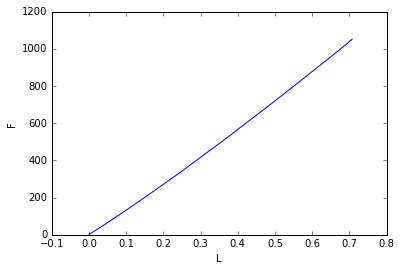

In [5]:
# Посмотрим, как выглядит график зависимости деформации от усилия F
sns.lineplot(data=df, x="L", y="F")

In [6]:
# Необходимо исключить из рассмотрения данные, поступившие после разрушения образца, 
# начиная с момента, когда F внезапно уменьшается
# Найдем разницу между каждой предыдущей строкой в колонке F
df['F_diff'] = df['F'].diff () 
# Выведем номера строк, когда прекращается рост F
df.query('F_diff <0').index

Int64Index([   3,  996,  997,  998,  999, 1054, 1055, 1056, 1057, 1058, 1059,
            1060, 1061, 1062, 1063, 1064],
           dtype='int64')

In [7]:
# Введем переменную 'a' - индекс первой строки датафрейма,  где F уменьшается 
# больше чем на 0,01. Это позволит исключить флуктуации в пределах первого десятка строк
# (это соответствует моменту разрушения образца, либо изменению условий эксперимента. 
# Данные, полученные после этого момента, исключаем из датасета)
a = df.query('F_diff <-0.01').index[0]
a

996

In [8]:
# Удалим лишние строки в конце датасета
df=df.drop(df.index[(a):])

In [9]:
# Выберем лишние строки в первых строках датафрейма, соответствующие флуктуациям начала эксперимента
b = df.query('F_diff <0').index[0]
b

3

In [10]:
# Удалим лишние строки в начале датасета
df=df.drop(df.index[:(b)])

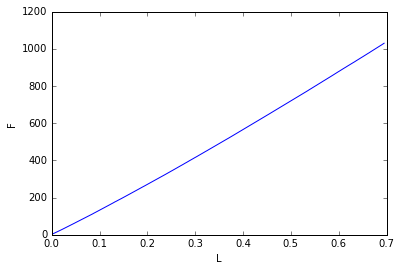

In [11]:
# Посмотрим, как теперь выглядит график зависимости L-F
df.shape
sns.lineplot(data=df, x="L", y="F")

In [12]:
# Дополняем данные расчетным значением СОДЕРЖАНИЯ УГЛЕРОДА в процентах C_wt.
# Для данного эксперимента C_wt=62.523%
df = df.assign(C_wt='62.523')

In [13]:
# Добавляем колонку с расчетным значением ОТНОСИТЕЛЬНОГО УДЛИННЕНИЯ (%) dL(делим L на длину образца, 
# которая варьируется от 0,5 до 0,9. Установлено, что для данного эксперимента длина образца 0,7. => dL=L*1.42857)
df["dL"] = 1.42857 * df["L"]

In [14]:
# Добавляем колонку с расчетным значением НАПРЯЖЕНИЯ (МПа) Stress
# Площадь сечения образца - постоянная для всех экспериментов s = 2.2375 => Stress = F*.2.2375
df["Stress"] = 2.2375 * df["F"]

In [15]:
df.shape
df.head(5)

,L,F,F_diff,C_wt,dL,Stress
3,0.000109,2.490988,-0.007746,62.523,0.000156,5.573586
4,0.000109,2.549915,0.058927,62.523,0.000156,5.705434
5,0.000131,2.580928,0.031013,62.523,0.000187,5.774827
6,0.000304,2.784053,0.203125,62.523,0.000434,6.229319
7,0.000369,3.104976,0.320923,62.523,0.000527,6.947384


In [16]:
# Сохраним полученный датафрейм в формате CSV без индекса
df.to_csv('2_1_2__13.csv', index=False)

### Повторяем процедуру для следующего эксперимента


(984, 2)

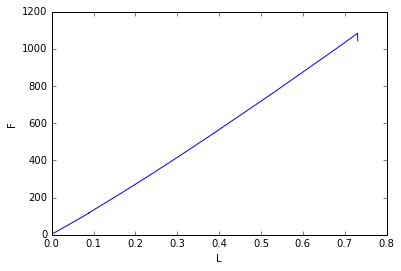

In [17]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2_2__15.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [18]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([3, 112, 983], dtype='int64')

In [19]:
df=df.drop(df.index[(983):])

In [20]:
df=df.drop(df.index[:(3)])

(980, 3)

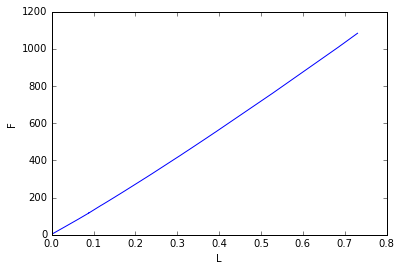

In [21]:
sns.lineplot(data=df, x="L", y="F")
df.shape

In [22]:
df = df.assign(C_wt='62.523')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 2.2375 * df["F"]

In [23]:
# Сохраним полученный датафрейм
df.to_csv('2_2__15.csv', index=False)

(1015, 2)

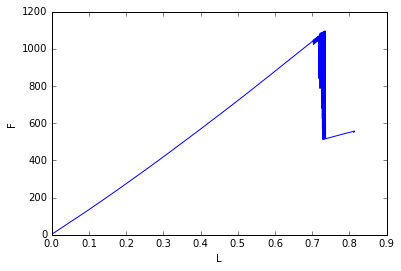

In [24]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2_5_2__16.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [25]:
df['L_diff'] = df['L'].diff ()
df.query('L_diff <0').index

Int64Index([ 880,  881,  882,  883,  884,  885,  886,  887,  888,  889,  890,
             891,  892,  893,  894,  895,  896,  897,  899,  900,  929,  930,
             931,  932, 1013, 1014],
           dtype='int64')

In [26]:
df=df.drop(df.index[(880):])

(880, 3)

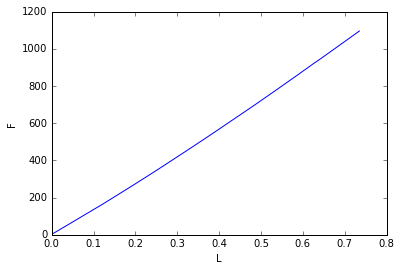

In [27]:
sns.lineplot(data=df, x="L", y="F")
df.shape

In [28]:
df = df.assign(C_wt='62.523')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 2.2375 * df["F"]

In [29]:
# Сохраним полученный датафрейм
df.to_csv('2_5_2__16.csv', index=False)

(141, 2)

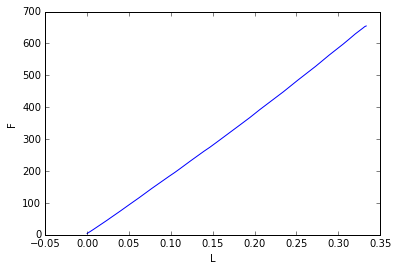

In [30]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2_6.3_2__2.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [31]:
df['L_diff'] = df['L'].diff ()
df.query('L_diff <0').index

Int64Index([1], dtype='int64')

In [32]:
#df=df.drop(df.index[( ):])

In [33]:
#sns.lineplot(data=df, x="L", y="F")
#df.shape

In [34]:
df = df.assign(C_wt='81.909')
df["dL"] = 2 * df["L"]
df["Stress"] = 2.2375 * df["F"]

In [35]:
df.to_csv('2_6.3_2__2.csv', index=False)

(131, 2)

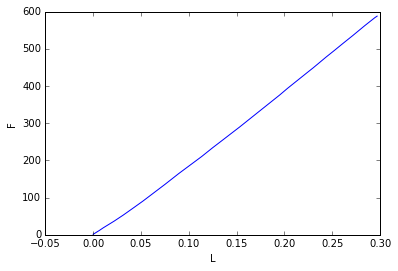

In [36]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2_6.5_2__4.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [37]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([], dtype='int64')

In [38]:
df = df.assign(C_wt='81.909')
df["dL"] = 2 * df["L"]
df["Stress"] = 2.2375 * df["F"]
df.to_csv('2_6.5_2__4.csv', index=False)

(170, 2)

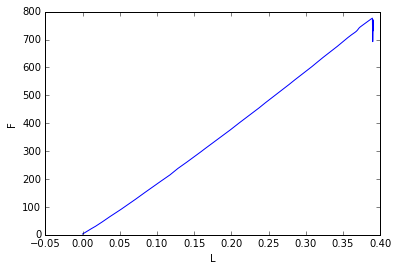

In [39]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2_6.6_2__5.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [40]:
df['L_diff'] = df['L'].diff ()
df.query('L_diff <0').index

Int64Index([1, 4, 169], dtype='int64')

In [41]:
df=df.drop(df.index[(167):])

In [42]:
df=df.drop(df.index[:(4)])

(163, 3)

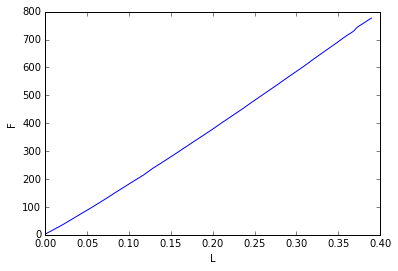

In [43]:
sns.lineplot(data=df, x="L", y="F")
df.shape

In [44]:
df = df.assign(C_wt='81.909')
df["dL"] = 2 * df["L"]
df["Stress"] = 2.2375 * df["F"]
df.to_csv('2_6.6_2__5.csv', index=False)

(136, 2)

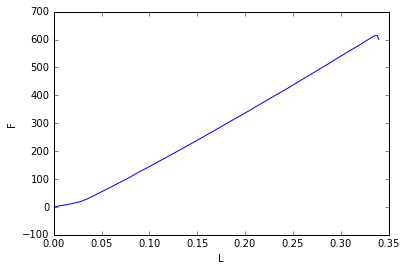

In [45]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2_6.7_2__6.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [46]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([1, 2, 3, 134, 135], dtype='int64')

In [47]:
df=df.drop(df.index[(134):])

In [48]:
df=df.drop(df.index[:(3)])

(131, 3)

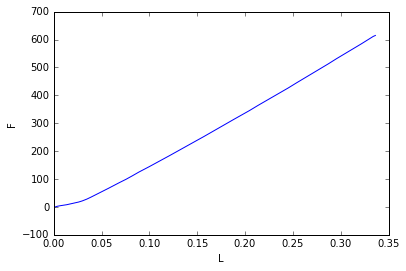

In [49]:
sns.lineplot(data=df, x="L", y="F")
df.shape

In [50]:
df = df.assign(C_wt='81.909')
df["dL"] = 2 * df["L"]
df["Stress"] = 2.2375 * df["F"]
df.to_csv('2_6.7_2__6.csv', index=False)

(130, 2)

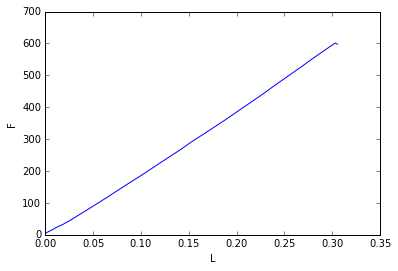

In [51]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2_6.8_2__7.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [52]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([2, 129], dtype='int64')

In [53]:
df=df.drop(df.index[(129):])
df=df.drop(df.index[:(2)])

In [54]:
df.shape

(127, 3)

In [55]:
df.head(5)

,L,F,F_diff
2,0.000066,4.718160,-0.044937
3,0.000103,4.733625,0.015465
4,0.000098,4.872772,0.139147
5,0.000712,5.949432,1.076660
6,0.001394,7.009979,1.060547


In [56]:
df = df.assign(C_wt='81.909')
df["dL"] = 2 * df["L"]
df["Stress"] = 2.2375 * df["F"]
df.to_csv('2_6.8_2__7.csv', index=False)

(124, 2)

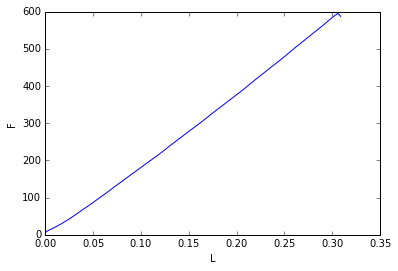

In [57]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2_6.10_2__9.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [58]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([123], dtype='int64')

In [59]:
df=df.drop(df.index[(123):])

In [60]:
df = df.assign(C_wt='81.909')
df["dL"] = 2 * df["L"]
df["Stress"] = 2.2375 * df["F"]
df.to_csv('2_6.10_2__9.csv', index=False)

(148, 2)

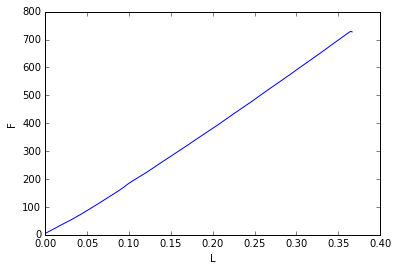

In [61]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2_6.11_2__10.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [62]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([147], dtype='int64')

In [63]:
df=df.drop(df.index[(147):])

In [64]:
df = df.assign(C_wt='81.909')
df["dL"] = 2 * df["L"]
df["Stress"] = 2.2375 * df["F"]
df.to_csv('2_6.11_2__10.csv', index=False)

(166, 2)

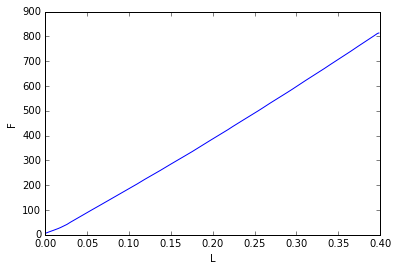

In [65]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2_6.12_2__11.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [66]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([1], dtype='int64')

In [67]:
df=df.drop(df.index[:(1)])

In [68]:
df = df.assign(C_wt='81.909')
df["dL"] = 2 * df["L"]
df["Stress"] = 2.2375 * df["F"]
df.to_csv('2_6.12_2__11.csv', index=False)

(759, 2)

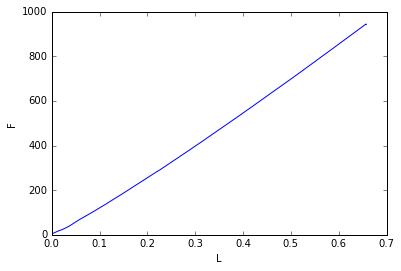

In [69]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2_10__2_20.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [70]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([1, 3, 758], dtype='int64')

In [71]:
df=df.drop(df.index[(758):])
df=df.drop(df.index[:(3)])

In [72]:
df = df.assign(C_wt='62.523')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 2.2375 * df["F"]
df.to_csv('2_10__2_20.csv', index=False)

(966, 2)

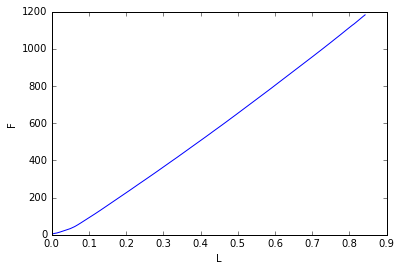

In [73]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2_10b_2__23.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [74]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([], dtype='int64')

In [75]:
df = df.assign(C_wt='62.523')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 2.2375 * df["F"]
df.to_csv('2_10b_2__23.csv', index=False)

(966, 2)

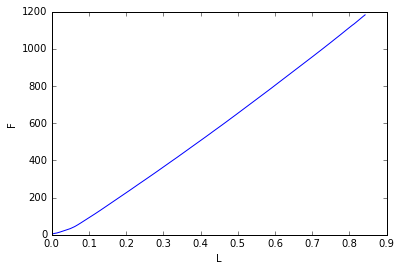

In [76]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2_20_2__21.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [77]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([], dtype='int64')

In [78]:
df = df.assign(C_wt='62.523')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 2.2375 * df["F"]
df.to_csv('2_20_2__21.csv', index=False)

(381, 2)

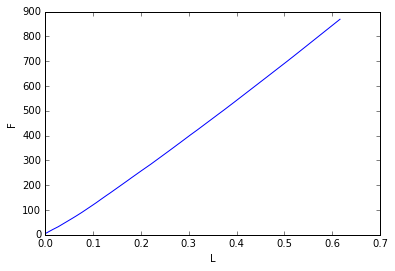

In [79]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2_20_2__21b.xls",
                   sheet_name = 3,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [80]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([2, 3], dtype='int64')

In [81]:
df=df.drop(df.index[:(3)])

In [82]:
df = df.assign(C_wt='62.523')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 2.2375 * df["F"]
df.to_csv('2_20_2__21b.csv', index=False)

(305, 2)

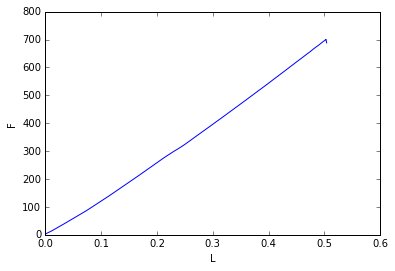

In [83]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2_20b_2__25.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [84]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([304], dtype='int64')

In [85]:
df=df.drop(df.index[(304):])

In [86]:
df = df.assign(C_wt='62.523')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 2.2375 * df["F"]
df.to_csv('2_20b_2__25.csv', index=False)

(161, 2)

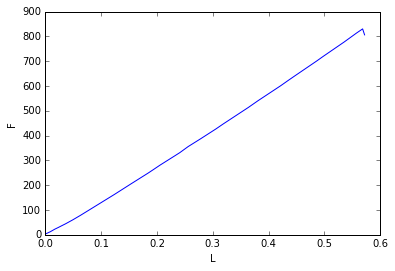

In [87]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2_50_2__27.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [88]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([160], dtype='int64')

In [89]:
df=df.drop(df.index[(160):])

In [90]:
df = df.assign(C_wt='62.523')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 2.2375 * df["F"]
df.to_csv('2_50_2__27.csv', index=False)

(761, 2)

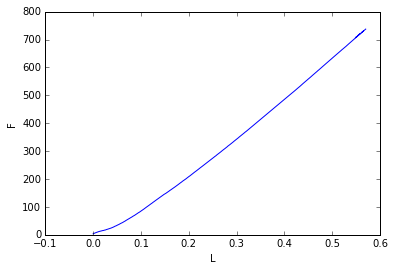

In [91]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2_v1-1-1_2__29.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [92]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([  2,   4,   5, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746,
            747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759,
            760],
           dtype='int64')

In [93]:
df=df.drop(df.index[(737):])
df=df.drop(df.index[:(4)])

In [94]:
df = df.assign(C_wt='80.195')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 2.2375 * df["F"]
df.to_csv('2_v1-1-1_2__29.csv', index=False)

(945, 2)

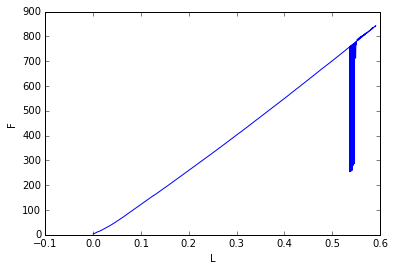

In [95]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2_v1-1-2_2__30.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [96]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([  2,   3, 159, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830,
            831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843,
            844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856,
            857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869,
            882, 883, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940,
            941, 943, 944],
           dtype='int64')

In [97]:
df=df.drop(df.index[(821):])
df=df.drop(df.index[:(3)])

In [98]:
df = df.assign(C_wt='80.195')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 2.2375 * df["F"]
df.to_csv('2_v1-1-2_2__30.csv', index=False)

(674, 2)

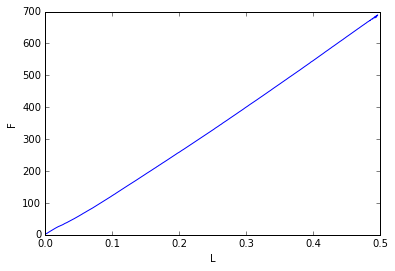

In [99]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2_v1-1-3_2__31.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [100]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([2, 4, 665, 666, 667, 668, 669, 670, 671, 672, 673], dtype='int64')

In [101]:
df=df.drop(df.index[(665):])
df=df.drop(df.index[:(4)])

In [102]:
df = df.assign(C_wt='80.195')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 2.2375 * df["F"]
df.to_csv('2_v1-1-3_2__31.csv', index=False)

(787, 2)

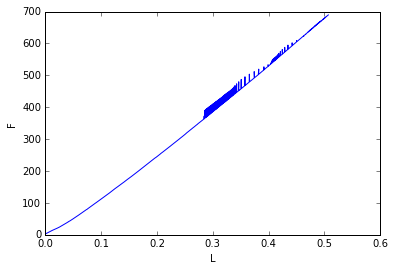

In [103]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2_v1-1-4_2__32.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [104]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([  1,   4, 668, 669, 670, 671, 672, 673, 674, 675,
            ...
            777, 778, 779, 780, 781, 782, 783, 784, 785, 786],
           dtype='int64', length=121)

In [105]:
df=df.drop(df.index[(668):])
df=df.drop(df.index[:(4)])

In [106]:
df = df.assign(C_wt='80.195')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 2.2375 * df["F"]
df.to_csv('2_v1-1-4_2__32.csv', index=False)

(651, 2)

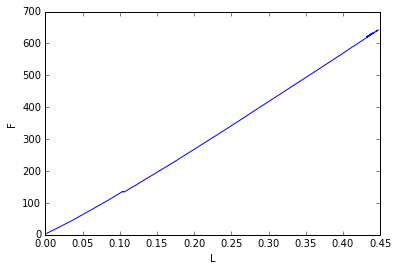

In [107]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2_v1-1-5_2__33.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [108]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([  2, 136, 137, 138, 139, 634, 635, 636, 637, 638, 639, 640, 641,
            642, 643, 644, 645, 646, 647, 648, 649, 650],
           dtype='int64')

In [109]:
df=df.drop(df.index[(136):])
df=df.drop(df.index[:(2)])

In [110]:
df = df.assign(C_wt='80.195')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 2.2375 * df["F"]
df.to_csv('2_v1-1-5_2__33.csv', index=False)

(740, 2)

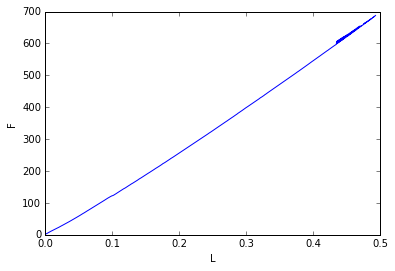

In [111]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2_v1-1-6_2__35.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [112]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689,
            690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702,
            703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715,
            716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728,
            729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739],
           dtype='int64')

In [113]:
df=df.drop(df.index[(677):])

(677, 3)

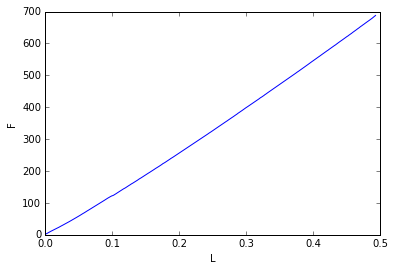

In [114]:
sns.lineplot(data=df, x="L", y="F")
df.shape

In [115]:
df = df.assign(C_wt='80.195')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 2.2375 * df["F"]
df.to_csv('2_v1-1-6_2__35.csv', index=False)

(602, 2)

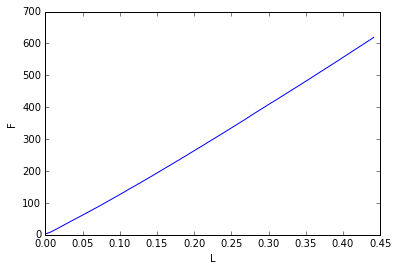

In [116]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2_v1-1-7_2__38.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [117]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([2, 601], dtype='int64')

In [118]:
df=df.drop(df.index[(601):])
df=df.drop(df.index[:(2)])

In [119]:
df = df.assign(C_wt='80.195')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 2.2375 * df["F"]
df.to_csv('2_v1-1-7_2__38.csv', index=False)

(836, 2)

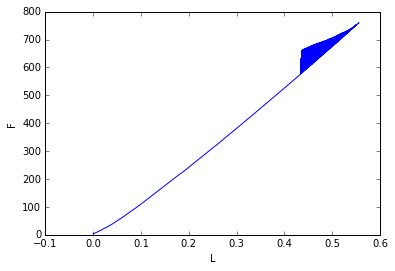

In [120]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2_v1-1-8_2__37.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [121]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([  3,   4, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752,
            753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765,
            766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778,
            779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791,
            792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804,
            805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817,
            818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830,
            831, 832, 833, 834, 835],
           dtype='int64')

In [122]:
df=df.drop(df.index[(742):])
df=df.drop(df.index[:(4)])

In [123]:
df = df.assign(C_wt='80.195')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 2.2375 * df["F"]
df.to_csv('2_v1-1-8_2__37.csv', index=False)

(734, 2)

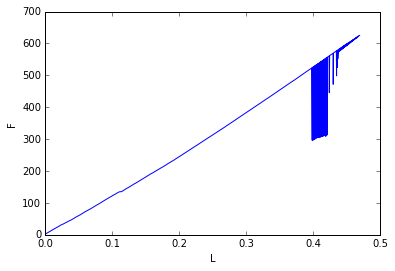

In [124]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2_v1-1-9_2__39.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [125]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([136, 137, 614, 615, 616, 617, 618, 619, 620, 621,
            ...
            723, 724, 725, 726, 727, 728, 729, 730, 732, 733],
           dtype='int64', length=109)

In [126]:
df=df.drop(df.index[(614):])

(614, 3)

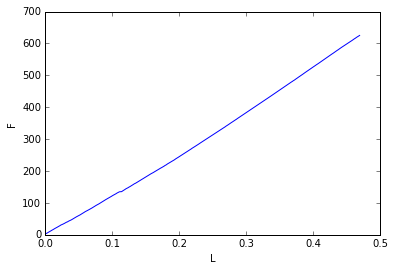

In [127]:
sns.lineplot(data=df, x="L", y="F")
df.shape

In [128]:
df = df.assign(C_wt='80.195')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 2.2375 * df["F"]
df.to_csv('2_v1-1-9_2__39.csv', index=False)

(591, 2)

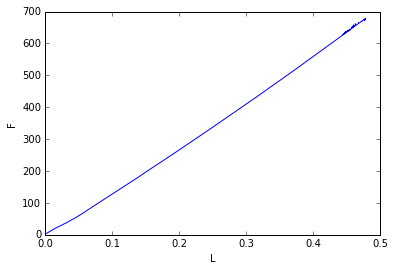

In [129]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2_v1-5-1_2__40.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [130]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([  1,   3, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569,
            570, 571, 572, 573, 574, 575, 582, 583, 584, 585, 586, 587, 588,
            589, 590],
           dtype='int64')

In [131]:
df=df.drop(df.index[(559):])
df=df.drop(df.index[:(3)])

In [132]:
df = df.assign(C_wt='80.195')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 2.2375 * df["F"]
df.to_csv('2_v1-5-1_2__40.csv', index=False)

(793, 2)

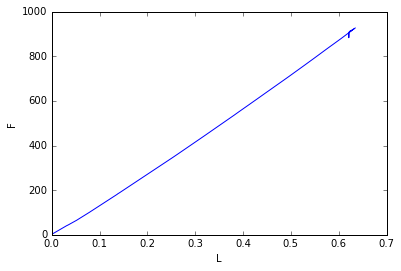

In [133]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2_v1-5-2_2__41.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [134]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([1, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790,
            791, 792],
           dtype='int64')

In [135]:
df=df.drop(df.index[(778):])
df=df.drop(df.index[:(1)])

In [136]:
df = df.assign(C_wt='80.195')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 2.2375 * df["F"]
df.to_csv('2_v1-5-2_2__41.csv', index=False)

(782, 2)

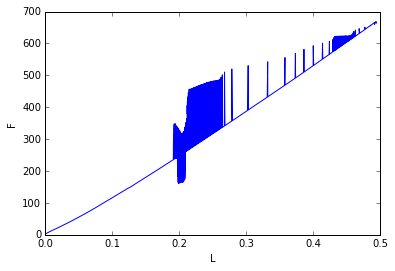

In [137]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2_v1-5-3_2__42.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [138]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([  1,   3, 567, 568, 569, 570, 571, 572, 573, 574,
            ...
            753, 754, 755, 756, 757, 758, 759, 760, 780, 781],
           dtype='int64', length=129)

In [139]:
df=df.drop(df.index[(567):])
df=df.drop(df.index[:(3)])

In [140]:
df = df.assign(C_wt='80.195')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 2.2375 * df["F"]
df.to_csv('2_v1-5-3_2__42.csv', index=False)

(685, 2)

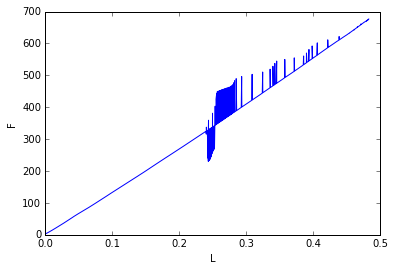

In [141]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2_v1-5-4_2__44.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [142]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576,
            577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589,
            590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602,
            603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615,
            616, 617, 618, 619, 620, 621, 622, 623, 662, 663, 664, 665, 666,
            667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679,
            680, 681, 682, 683, 684],
           dtype='int64')

In [143]:
df=df.drop(df.index[(564):])

In [144]:
df = df.assign(C_wt='80.195')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 2.2375 * df["F"]
df.to_csv('2_v1-5-4_2__44.csv', index=False)

(663, 2)

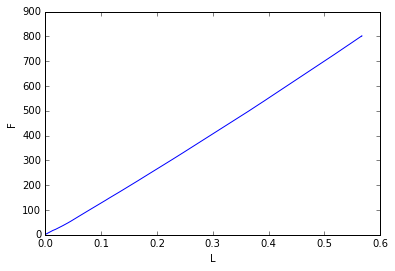

In [145]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2_v1-5-5_2__45.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [146]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([661, 662], dtype='int64')

In [147]:
df=df.drop(df.index[(661):])

In [148]:
df = df.assign(C_wt='80.195')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 2.2375 * df["F"]
df.to_csv('2_v1-5-5_2__45.csv', index=False)

(614, 2)

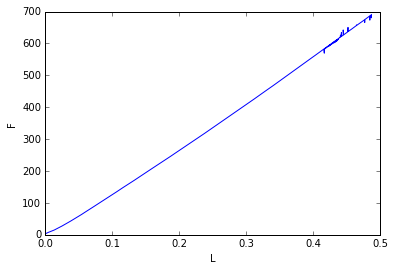

In [149]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2_v1-5-6_2__46.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [150]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([  2, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592,
            593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605,
            606, 607, 608, 609, 610, 611, 612, 613],
           dtype='int64')

In [151]:
df=df.drop(df.index[(581):])
df=df.drop(df.index[:(2)])

In [152]:
df = df.assign(C_wt='80.195')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 2.2375 * df["F"]
df.to_csv('2_v1-5-6_2__46.csv', index=False)

(588, 2)

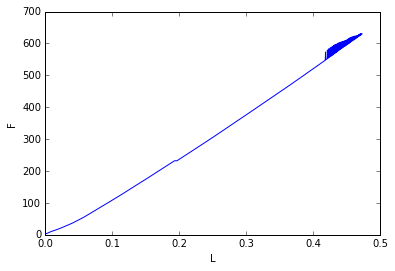

In [153]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2_v1-5-7_2__47.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [154]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([  1,   4, 200, 201, 482, 483, 484, 485, 486, 487, 545, 546, 547,
            548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560,
            561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573,
            574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586,
            587],
           dtype='int64')

In [155]:
df=df.drop(df.index[(482):])
df=df.drop(df.index[:(4)])

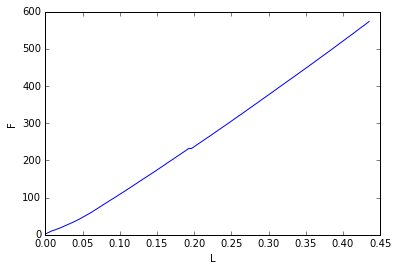

In [156]:
sns.lineplot(data=df, x="L", y="F")

In [157]:
df = df.assign(C_wt='80.195')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 2.2375 * df["F"]
df.to_csv('2_v1-5-7_2__47.csv', index=False)

(692, 2)

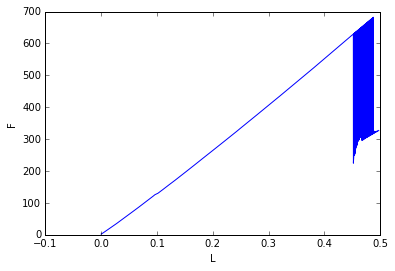

In [158]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2_v1-5-8_2__48.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [159]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570,
            571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583,
            611, 612, 613, 614, 627, 628, 629, 630, 631, 632, 633, 634, 635,
            636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648,
            649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661,
            662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674,
            675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687,
            688, 689, 690, 691],
           dtype='int64')

In [160]:
df=df.drop(df.index[(558):])

In [161]:
df = df.assign(C_wt='80.195')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 2.2375 * df["F"]
df.to_csv('2_v1-5-8_2__48.csv', index=False)

(588, 2)

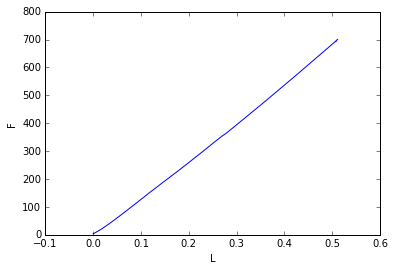

In [162]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2_v1-5-8red_2__49.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [163]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([1, 585, 586, 587], dtype='int64')

In [164]:
df=df.drop(df.index[(585):])
df=df.drop(df.index[:(1)])

In [165]:
df = df.assign(C_wt='80.195')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 2.2375 * df["F"]
df.to_csv('2_v1-5-8red_2__49.csv', index=False)

# Предобработка результатов (серия 3)

(2420, 2)

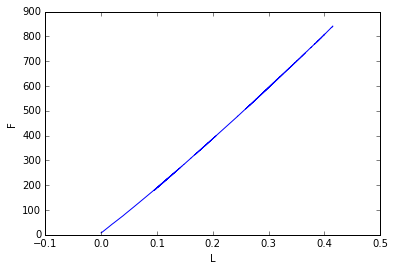

In [166]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/1_3__4.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [167]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([   1,    2,    4, 1038, 1039, 1040, 1041, 1042, 1043, 1044,
            ...
            2408, 2409, 2410, 2411, 2412, 2413, 2414, 2415, 2416, 2418],
           dtype='int64', length=1376)

In [168]:
df=df.drop(df.index[(1038):])
df=df.drop(df.index[:(4)])

(1034, 3)

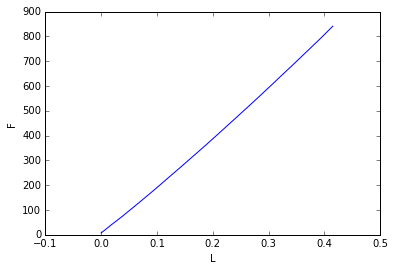

In [169]:
sns.lineplot(data=df, x="L", y="F")
df.shape

In [170]:
df = df.assign(C_wt='75.845')
df["dL"] = 2 * df["L"]
df["Stress"] = 1.762269 * df["F"]
df.to_csv('1_3__4.csv', index=False)

(840, 2)

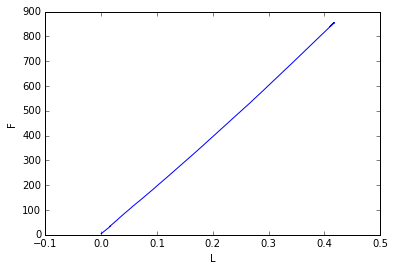

In [171]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/1-2_3__7.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [172]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([1, 3, 4, 825, 826, 830, 831, 832, 833, 834, 835, 836, 837, 838,
            839],
           dtype='int64')

In [173]:
df=df.drop(df.index[(825):])
df=df.drop(df.index[:(4)])

In [174]:
df = df.assign(C_wt='77.342')
df["dL"] = 2 * df["L"]
df["Stress"] = 1.644163 * df["F"]


In [175]:
df.to_csv('1-2_3__7.csv', index=False)

(649, 2)

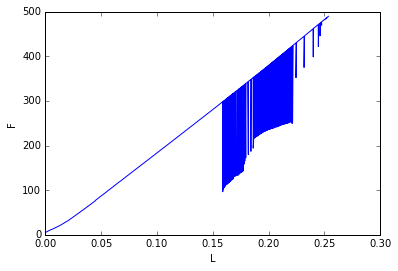

In [176]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/1-3_3__8.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [177]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([  2,   3, 474, 475, 476, 477, 478, 479, 480, 481,
            ...
            636, 637, 640, 641, 642, 643, 644, 645, 646, 647],
           dtype='int64', length=158)

In [178]:
df=df.drop(df.index[(474):])
df=df.drop(df.index[:(3)])

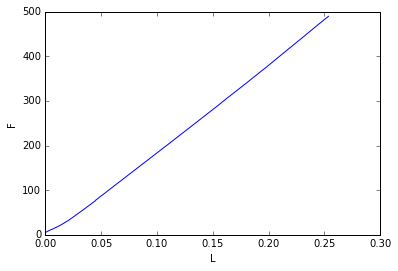

In [179]:
sns.lineplot(data=df, x="L", y="F")

In [180]:
df = df.assign(C_wt='83.075')
df["dL"] = 2 * df["L"]
df["Stress"] = 1.848221 * df["F"]
df.to_csv('1-3_3__8.csv', index=False)

(487, 2)

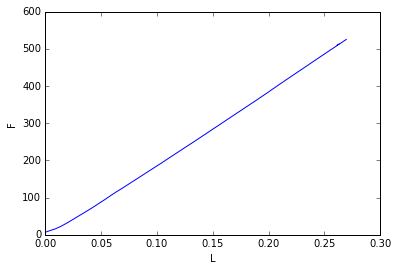

In [181]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2-2_3__10.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [182]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([1, 3, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485,
            486],
           dtype='int64')

In [183]:
df=df.drop(df.index[(474):])
df=df.drop(df.index[:(3)])

In [184]:
df = df.assign(C_wt='83.892')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.682177 * df["F"]
df.to_csv('12-2_3__10.csv', index=False)

(436, 2)

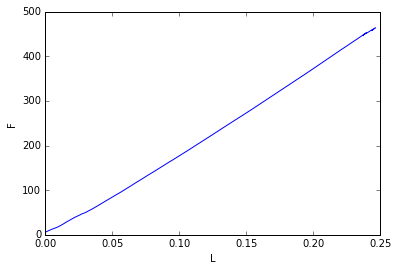

In [185]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2-3_3__11.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [186]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([2, 3, 4, 406, 407, 408, 409, 410, 431, 432, 433, 434, 435], dtype='int64')

In [187]:
df=df.drop(df.index[(406):])
df=df.drop(df.index[:(4)])

In [188]:
df = df.assign(C_wt='84.889')
df["dL"] = 2 * df["L"]
df["Stress"] = 1.893575 * df["F"]
df.to_csv('2-3_3__11.csv', index=False)

(849, 2)

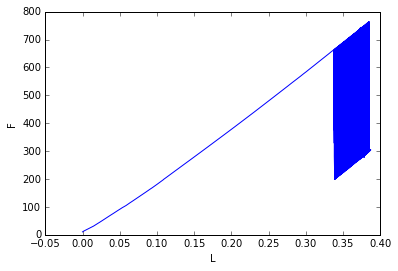

In [189]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2-4_3__27.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [190]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([  1,   2, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685,
            686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698,
            699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711,
            712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724,
            725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 836, 837,
            838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848],
           dtype='int64')

In [191]:
df=df.drop(df.index[(675):])
df=df.drop(df.index[:(2)])

In [192]:
df = df.assign(C_wt='80.687')
df["dL"] = 2 * df["L"]
df["Stress"] = 1.682177 * df["F"]
df.to_csv('2-4_3__27.csv', index=False)

(991, 2)

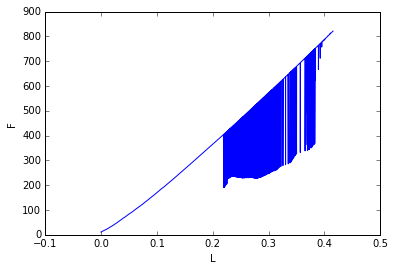

In [193]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2-5_3__28.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape


In [194]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([  1,   3,   4, 735, 736, 737, 738, 739, 740, 741,
            ...
            977, 978, 979, 980, 981, 982, 983, 985, 987, 990],
           dtype='int64', length=178)

In [195]:
df=df.drop(df.index[(735):])
df=df.drop(df.index[:(4)])

In [196]:
df = df.assign(C_wt='81.933')
df["dL"] = 2 * df["L"]
df["Stress"] = 1.721525 * df["F"]
df.to_csv('2-5_3__28.csv', index=False)

(696, 2)

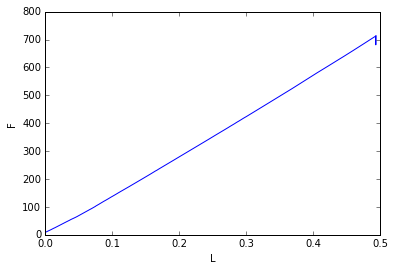

In [197]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2.1_3__32.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [198]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([1, 3, 694, 695], dtype='int64')

In [199]:
df=df.drop(df.index[(694):])
df=df.drop(df.index[:(3)])

In [200]:
df = df.assign(C_wt='80.664')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.644163 * df["F"]
df.to_csv('2.1_3__32.csv', index=False)

(692, 2)

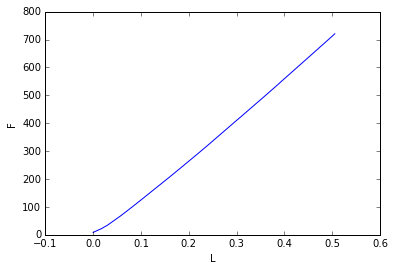

In [201]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2.4_3__33.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [202]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([2, 690, 691], dtype='int64')

In [203]:
df=df.drop(df.index[(690):])
df=df.drop(df.index[:(2)])

In [204]:
df = df.assign(C_wt='79.169')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.682177 * df["F"]
df.to_csv('2.4_3__33.csv', index=False)

(513, 2)

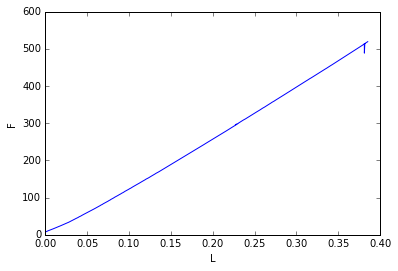

In [205]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2.6_3__34.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [206]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([1, 2, 4, 288, 289, 290, 291, 507, 508, 509, 510, 511, 512], dtype='int64')

In [207]:
df=df.drop(df.index[(507):])
df=df.drop(df.index[:(4)])

In [208]:
df = df.assign(C_wt='81.561')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.721525 * df["F"]
df.to_csv('2.6_3__34.csv', index=False)

(524, 2)

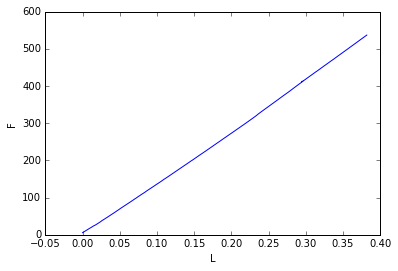

In [209]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2.8_3__36.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [210]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([2, 3, 394, 395, 396, 522, 523], dtype='int64')

In [211]:
df=df.drop(df.index[(522):])
df=df.drop(df.index[:(3)])

In [212]:
df = df.assign(C_wt='82.320')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.848221 * df["F"]
df.to_csv('2.8_3__36.csv', index=False) 

(500, 2)

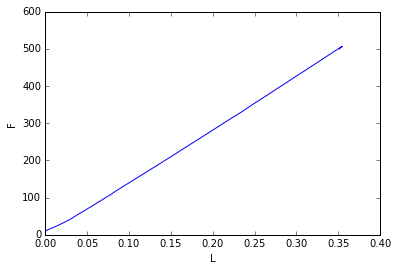

In [213]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/2.10_3__37.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [214]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([2, 4, 5, 480, 481, 482, 483, 484, 485, 486, 496, 497, 498, 499], dtype='int64')

In [215]:
df=df.drop(df.index[(480):])
df=df.drop(df.index[:(5)])

In [216]:
df = df.assign(C_wt='81.781')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.571901 * df["F"]
df.to_csv('2.10_3__37.csv', index=False)

(501, 2)

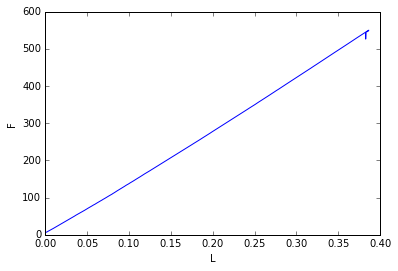

In [217]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/3.6_3__39.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
df.shape

In [218]:
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

Int64Index([2, 4, 496, 497, 498, 499, 500], dtype='int64')

In [219]:
df=df.drop(df.index[(496):])
df=df.drop(df.index[:(4)])

In [220]:
df = df.assign(C_wt='81.405')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.721525 * df["F"]
df.to_csv('3.6_3__39.csv', index=False)

(514, 2)


Int64Index([1, 3, 5, 512, 513], dtype='int64')

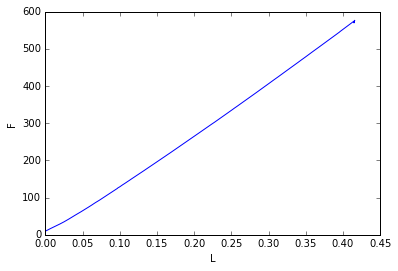

In [221]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/3.7_3__40.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [222]:
df=df.drop(df.index[(512):])
df=df.drop(df.index[:(5)])

In [223]:
df = df.assign(C_wt='80.644')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.472123 * df["F"]
df.to_csv('3.7_3__40.csv', index=False)

(464, 2)


Int64Index([1, 3], dtype='int64')

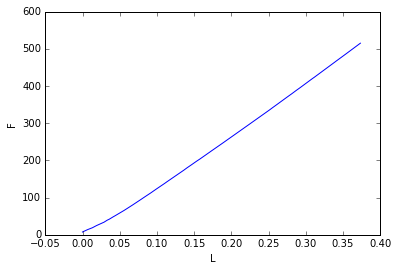

In [224]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/3.8_3__41.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [225]:
df=df.drop(df.index[:(3)])

In [226]:
df = df.assign(C_wt='80.764')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.762269 * df["F"]
df.to_csv('3.8_3__41.csv', index=False)

(420, 2)


Int64Index([1, 3, 4, 419], dtype='int64')

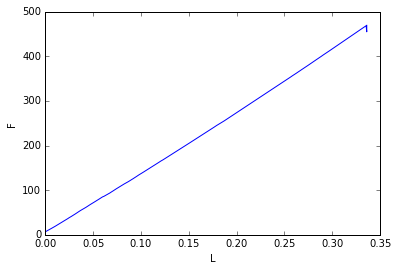

In [227]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/3.10_3__42.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [228]:
df=df.drop(df.index[(419):])
df=df.drop(df.index[:(4)])

In [229]:
df = df.assign(C_wt='83.901')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.762269 * df["F"]
df.to_csv('3.10_3__42.csv', index=False)

(479, 2)


Int64Index([3], dtype='int64')

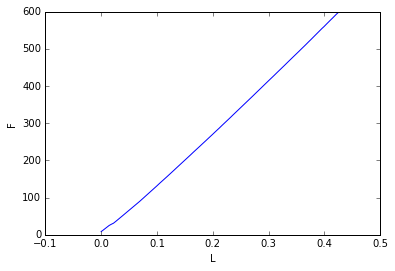

In [230]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/4.1_3__43.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [231]:
df=df.drop(df.index[:(3)])

In [232]:
df = df.assign(C_wt='75.888')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.940618 * df["F"]
df.to_csv('4.1_3__43.csv', index=False)

(457, 2)


Int64Index([4, 455, 456], dtype='int64')

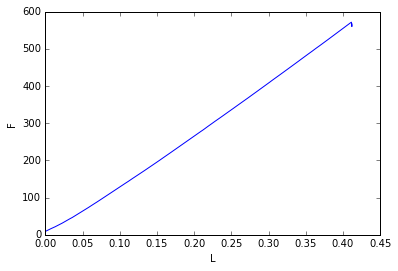

In [233]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/4.2_3__44.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [234]:
df=df.drop(df.index[(455):])
df=df.drop(df.index[:(4)])

In [235]:
df = df.assign(C_wt='78.038')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.644163 * df["F"]
df.to_csv('4.2_3__44.csv', index=False)

(495, 2)


Int64Index([1, 494], dtype='int64')

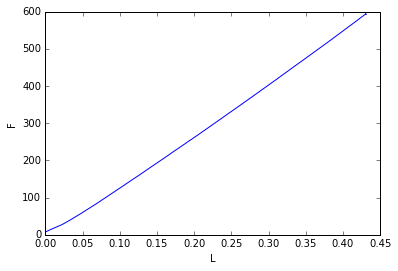

In [236]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/4.3_3__45.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [237]:
df=df.drop(df.index[(494):])
df=df.drop(df.index[:(1)])

In [238]:
df = df.assign(C_wt='76.555')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.940618 * df["F"]
df.to_csv('4.3_3__45.csv', index=False)

(521, 2)


Int64Index([3], dtype='int64')

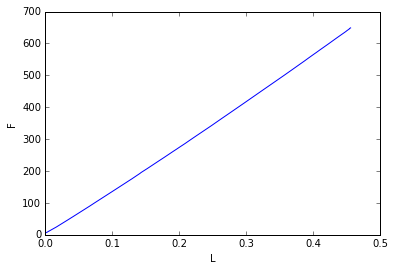

In [239]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/4.4_3__46.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [240]:
df=df.drop(df.index[(521):])
df=df.drop(df.index[:(2)])

In [241]:
df = df.assign(C_wt='78.442')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 2.040121 * df["F"]
df.to_csv('4.4_3__46.csv', index=False)

(554, 2)


Int64Index([], dtype='int64')

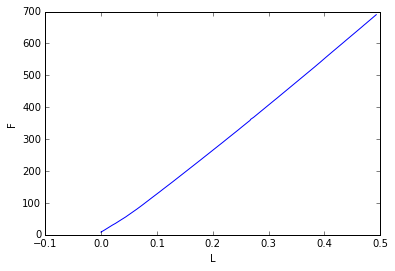

In [242]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/4.5_3__47.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [243]:
df=df.drop(df.index[(554):])
df=df.drop(df.index[:(2)])

In [244]:
df = df.assign(C_wt='76.112')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.721525 * df["F"]
df.to_csv('4.5_3__47.csv', index=False)

(427, 2)


Int64Index([2, 3, 423, 424, 425, 426], dtype='int64')

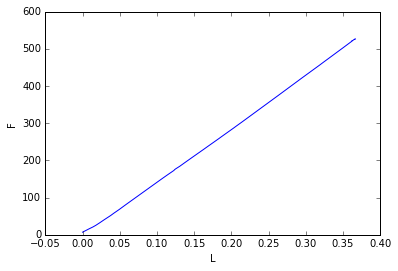

In [245]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/4.6_3__48.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [246]:
df=df.drop(df.index[(423):])
df=df.drop(df.index[:(3)])

In [247]:
df = df.assign(C_wt='80.061')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.762269 * df["F"]
df.to_csv('4.6_3__48.csv', index=False)

(474, 2)


Int64Index([2, 3, 473], dtype='int64')

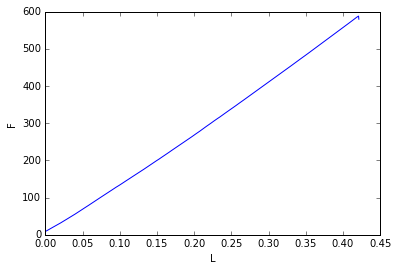

In [248]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/4.7_3__50.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [249]:
df=df.drop(df.index[(473):])
df=df.drop(df.index[:(3)])

In [250]:
df = df.assign(C_wt='78.428')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.607423 * df["F"]
df.to_csv('4.7_3__50.csv', index=False)

(529, 2)


Int64Index([3], dtype='int64')

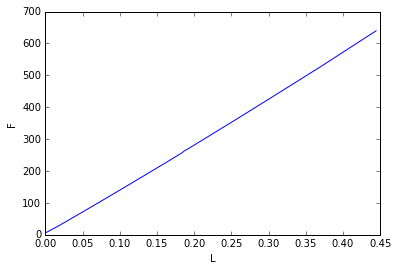

In [251]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/4.8_3__51.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [252]:
df=df.drop(df.index[:(3)])

In [253]:
df = df.assign(C_wt='74.956')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.682177 * df["F"]
df.to_csv('4.8_3__51.csv', index=False)

(463, 2)


Int64Index([  2,   3,   4, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457,
            458, 459, 460, 461, 462],
           dtype='int64')

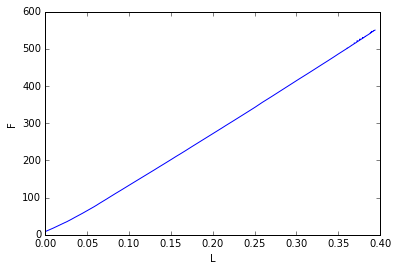

In [254]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/4.9_3__52.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [255]:
df=df.drop(df.index[(448):])
df=df.drop(df.index[:(4)])

In [256]:
df = df.assign(C_wt='78.679')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.762269 * df["F"]
df.to_csv('4.9_3__52.csv', index=False)

(490, 2)


Int64Index([3, 489], dtype='int64')

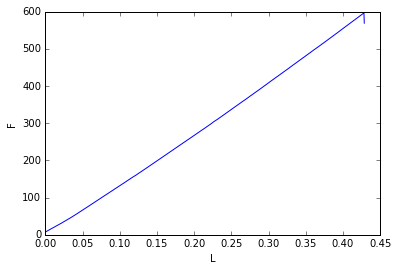

In [257]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/4.10_3__53.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [258]:
df=df.drop(df.index[(489):])
df=df.drop(df.index[:(3)])

In [259]:
df = df.assign(C_wt='77.204')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.571901 * df["F"]
df.to_csv('4.10_3__53.csv', index=False)

(688, 2)


Int64Index([1, 2], dtype='int64')

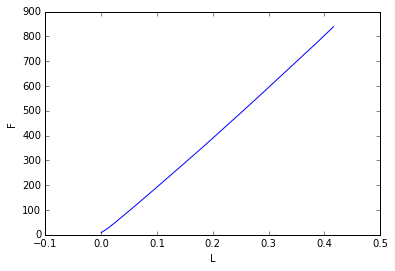

In [260]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/5-1_3__12.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [261]:
df=df.drop(df.index[:(2)])

In [262]:
df = df.assign(C_wt='75.016')
df["dL"] = 2 * df["L"]
df["Stress"] = 1.537543 * df["F"]
df.to_csv('5-1_3__12.csv', index=False)

(585, 2)


Int64Index([  2,   3, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483,
            484, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507,
            508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520,
            521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533,
            534, 535, 536, 537, 544, 545, 546, 547, 548, 549, 550, 551, 552,
            553, 554, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574,
            581, 582, 583],
           dtype='int64')

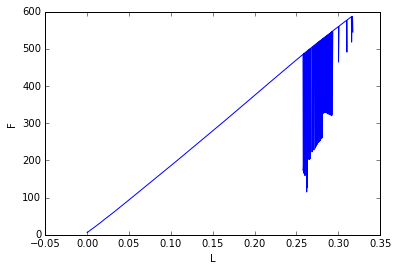

In [263]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/5-2_3__13.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [264]:
df=df.drop(df.index[(473):])
df=df.drop(df.index[:(3)])

In [265]:
df = df.assign(C_wt='84.948')
df["dL"] = 2 * df["L"]
df["Stress"] = 2.456095 * df["F"]
df.to_csv('5-2_3__13.csv', index=False)

(377, 2)


Int64Index([2, 3, 4, 372, 373, 374, 375, 376], dtype='int64')

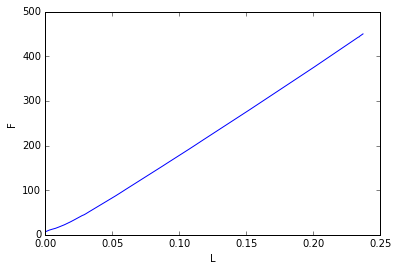

In [266]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/5-3_3__14.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [267]:
df=df.drop(df.index[(372):])
df=df.drop(df.index[:(4)])

In [268]:
df = df.assign(C_wt='85.349')
df["dL"] = 2 * df["L"]
df["Stress"] = 1.940618 * df["F"]
df.to_csv('5-3_3__14.csv', index=False)

(227, 2)


Int64Index([2, 3, 226], dtype='int64')

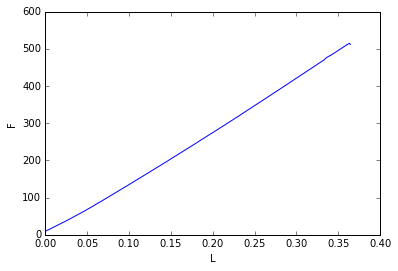

In [269]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/5.1_3__55.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [270]:
df=df.drop(df.index[(226):])
df=df.drop(df.index[:(3)])

In [271]:
df = df.assign(C_wt='76.434')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.440968 * df["F"]
df.to_csv('5.1_3__55.csv', index=False)

(229, 2)


Int64Index([], dtype='int64')

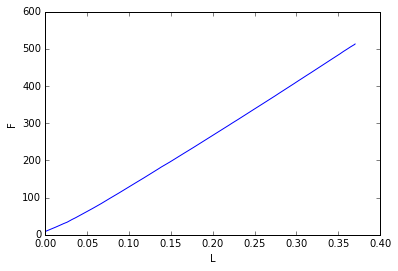

In [272]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/5.2_3__54.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [273]:
df = df.assign(C_wt='80.991')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.762269 * df["F"]
df.to_csv('5.2_3__54.csv', index=False)

(241, 2)


Int64Index([2], dtype='int64')

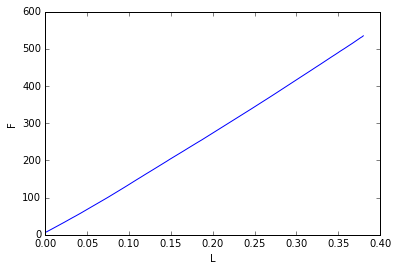

In [274]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/5.3_3__57.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [275]:
df=df.drop(df.index[:(2)])

In [276]:
df = df.assign(C_wt='75.927')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.472123 * df["F"]
df.to_csv('5.3_3__57.csv', index=False)

(266, 2)


Int64Index([1, 3], dtype='int64')

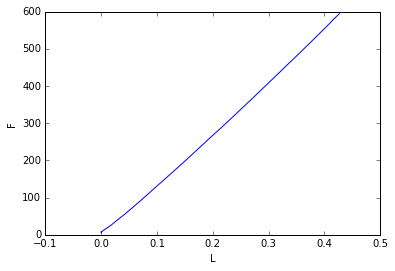

In [277]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/5.4_3__58.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [278]:
df=df.drop(df.index[:(3)])

In [279]:
df = df.assign(C_wt='78.666')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.644163 * df["F"]
df.to_csv('5.4_3__58.csv', index=False)

(259, 2)


Int64Index([1, 4, 258], dtype='int64')

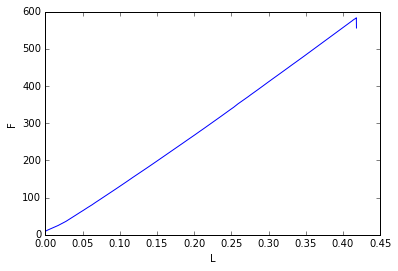

In [280]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/5.5_3__59.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [281]:
df=df.drop(df.index[(258):])
df=df.drop(df.index[:(4)])

In [282]:
df = df.assign(C_wt='75.815')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.5043 * df["F"]
df.to_csv('5.5_3__59.csv', index=False)

(244, 2)


Int64Index([1, 3, 243], dtype='int64')

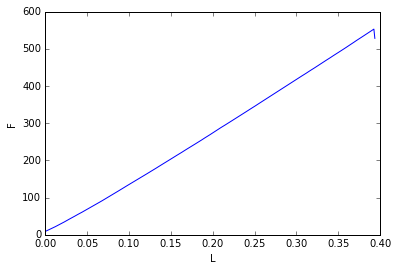

In [283]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/5.6_3__60.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [284]:
df=df.drop(df.index[(243):])
df=df.drop(df.index[:(3)])

In [285]:
df = df.assign(C_wt='76.285')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.571901 * df["F"]
df.to_csv('5.6_3__60.csv', index=False)

(291, 2)


Int64Index([], dtype='int64')

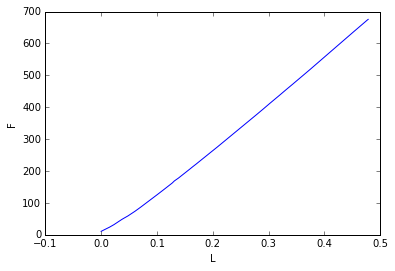

In [286]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/5.7_3__61.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [287]:
df = df.assign(C_wt='76.440')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.410792 * df["F"]
df.to_csv('5.7_3__61.csv', index=False)

(296, 2)


Int64Index([3, 295], dtype='int64')

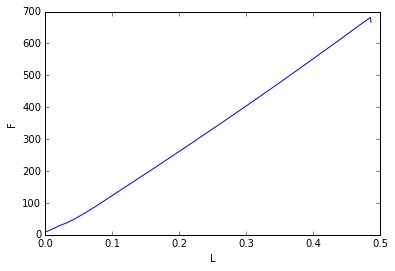

In [288]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/5.8_3__62.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [289]:
df=df.drop(df.index[(295):])
df=df.drop(df.index[:(3)])

In [290]:
df = df.assign(C_wt='78.088')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.804478 * df["F"]
df.to_csv('5.8_3__62.csv', index=False)

(222, 2)


Int64Index([2], dtype='int64')

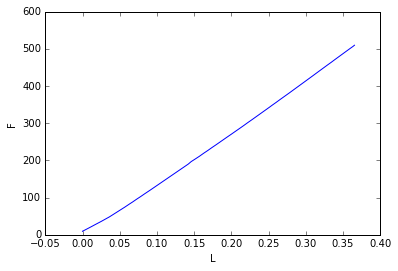

In [291]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/5.9_3__63.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [292]:
df=df.drop(df.index[:(2)])

In [293]:
df = df.assign(C_wt='78.056')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.472123 * df["F"]
df.to_csv('5.9_3__63.csv', index=False)

(222, 2)


Int64Index([2, 3, 221], dtype='int64')

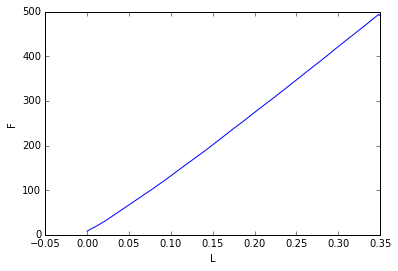

In [294]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/5.10_3__64.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [295]:
df=df.drop(df.index[(221):])
df=df.drop(df.index[:(3)])

In [296]:
df = df.assign(C_wt='76.102')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.5043 * df["F"]
df.to_csv('5.10_3__64.csv', index=False)

(432, 2)


Int64Index([1, 3, 431], dtype='int64')

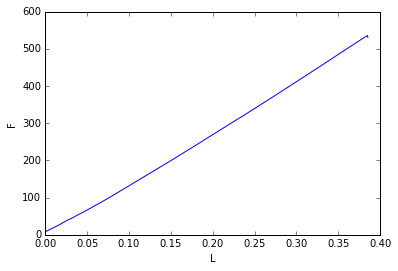

In [297]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/6.1_3__65.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [298]:
df=df.drop(df.index[(431):])
df=df.drop(df.index[:(3)])

In [299]:
df = df.assign(C_wt='79.485')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.721525 * df["F"]
df.to_csv('6.1_3__65.csv', index=False)

(433, 2)


Int64Index([2, 432], dtype='int64')

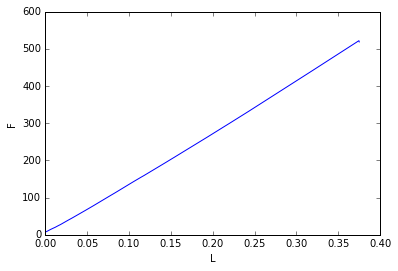

In [300]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/6.2_3__66.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [301]:
df=df.drop(df.index[(432):])
df=df.drop(df.index[:(2)])

In [302]:
df = df.assign(C_wt='82.837')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.804478 * df["F"]
df.to_csv('6.2_3__66.csv', index=False)

(386, 2)


Int64Index([1, 3], dtype='int64')

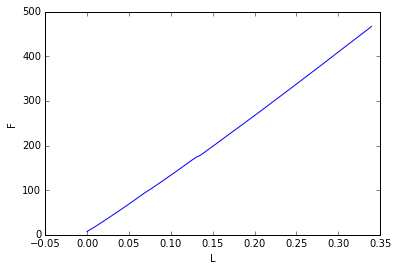

In [303]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/6.3_3__67.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [304]:
df=df.drop(df.index[:(3)])

In [305]:
df = df.assign(C_wt='82.995')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.989437 * df["F"]
df.to_csv('6.3_3__67.csv', index=False)

(412, 2)


Int64Index([2, 3, 411], dtype='int64')

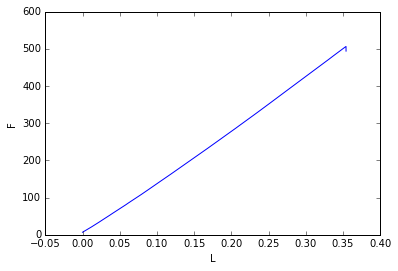

In [306]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/6.5_3__68.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [307]:
df=df.drop(df.index[(411):])
df=df.drop(df.index[:(3)])

In [308]:
df = df.assign(C_wt='81.462')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.762269 * df["F"]
df.to_csv('6.5_3__68.csv', index=False)

(344, 2)


Int64Index([2, 334], dtype='int64')

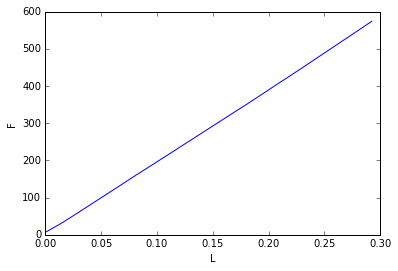

In [309]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/7-1_3__24.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [310]:
df=df.drop(df.index[(334):])
df=df.drop(df.index[:(2)])

In [311]:
df = df.assign(C_wt='79.849')
df["dL"] = 2 * df["L"]
df["Stress"] = 1.893575 * df["F"]
df.to_csv('7-1_3__24.csv', index=False)

(368, 2)


Int64Index([3, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367], dtype='int64')

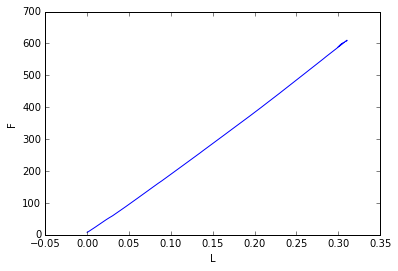

In [312]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/7-2_3__25.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [313]:
df=df.drop(df.index[(358):])
df=df.drop(df.index[:(3)])

In [314]:
df = df.assign(C_wt='78.469')
df["dL"] = 2 * df["L"]
df["Stress"] = 1.607423 * df["F"]
df.to_csv('7-2_3__25.csv', index=False)

(309, 2)


Int64Index([308], dtype='int64')

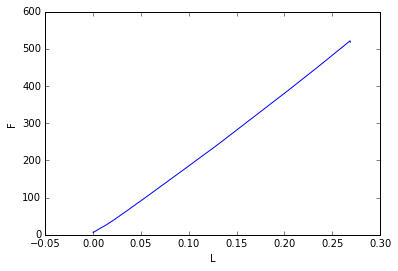

In [315]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/7-3_3__26.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [316]:
df=df.drop(df.index[(308):])

In [317]:
df = df.assign(C_wt='78.453')
df["dL"] = 2 * df["L"]
df["Stress"] = 1.721525 * df["F"]
df.to_csv('7-3_3__26.csv', index=False)

(329, 2)


Int64Index([2, 328], dtype='int64')

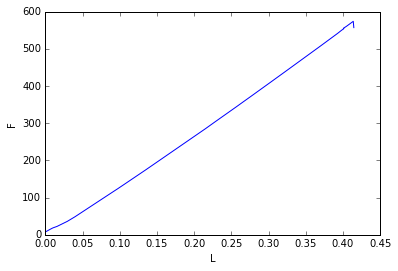

In [318]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/7.5_3__72.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [319]:
df=df.drop(df.index[(328):])
df=df.drop(df.index[:(2)])

In [320]:
df = df.assign(C_wt='75.173')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.762269 * df["F"]
df.to_csv('7.5_3__72.csv', index=False)

(361, 2)


Int64Index([4, 357, 358, 359, 360], dtype='int64')

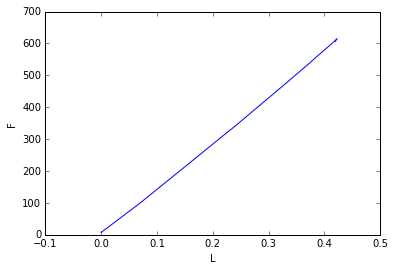

In [321]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/7.6_3__73.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [322]:
df=df.drop(df.index[(357):])
df=df.drop(df.index[:(4)])

In [323]:
df = df.assign(C_wt='76.709')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.644163 * df["F"]
df.to_csv('7.6_3__73.csv', index=False)

(325, 2)


Int64Index([1, 3, 316, 317, 318, 319, 320, 321, 322, 323, 324], dtype='int64')

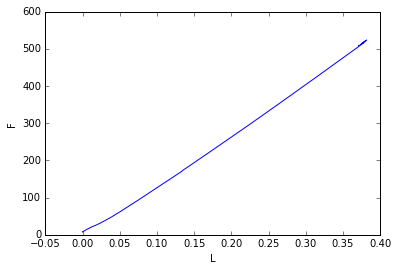

In [324]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/7.7_3__74.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [325]:
df=df.drop(df.index[(316):])
df=df.drop(df.index[:(3)])

In [326]:
df = df.assign(C_wt='82.278')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.804478 * df["F"]
df.to_csv('7.7_3__74.csv', index=False)

(269, 2)


Int64Index([3, 267, 268], dtype='int64')

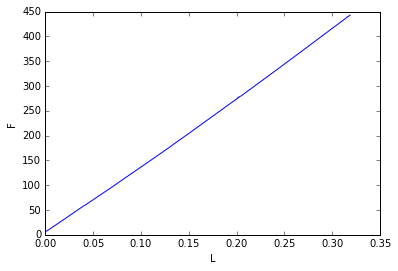

In [327]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/7.9_3__75.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [328]:
df=df.drop(df.index[(267):])
df=df.drop(df.index[:(3)])

In [329]:
df = df.assign(C_wt='78.522')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.721525 * df["F"]
df.to_csv('7.9_3__75.csv', index=False)

(322, 2)


Int64Index([2, 320], dtype='int64')

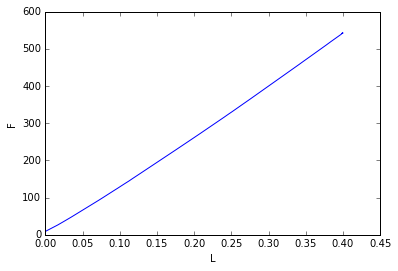

In [330]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/7.10_3__76.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index


In [331]:
df=df.drop(df.index[(320):])
df=df.drop(df.index[:(2)])

In [332]:
df = df.assign(C_wt='79.108')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.440968 * df["F"]
df.to_csv('7.10_3__76.csv', index=False)

(337, 2)


Int64Index([1, 3], dtype='int64')

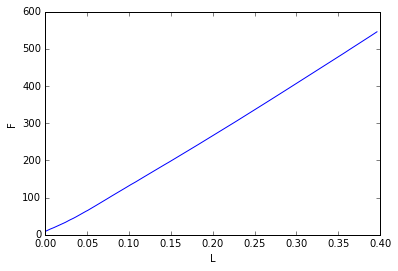

In [333]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/7.11_3__77.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [334]:
df=df.drop(df.index[:(3)])

In [335]:
df = df.assign(C_wt='77.132')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.410792 * df["F"]
df.to_csv('7.11_3__77.csv', index=False)

(275, 2)


Int64Index([1, 3, 274], dtype='int64')

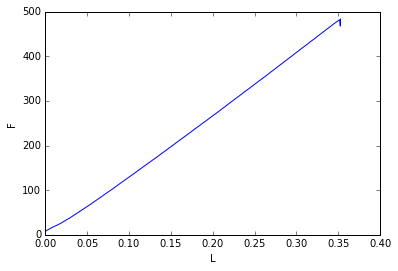

In [336]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/8.1_3__78.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [337]:
df=df.drop(df.index[(274):])
df=df.drop(df.index[:(3)])

In [338]:
df = df.assign(C_wt='83.634')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.721525 * df["F"]
df.to_csv('8.1_3__78.csv', index=False)

(350, 2)


Int64Index([3, 349], dtype='int64')

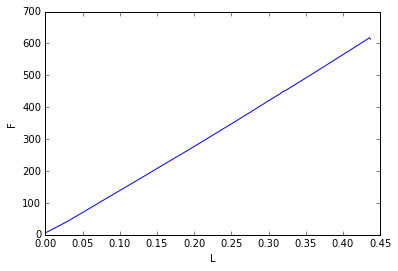

In [339]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/8.2_3__79.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [340]:
df=df.drop(df.index[(349):])
df=df.drop(df.index[:(3)])

In [341]:
df = df.assign(C_wt='81.284')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.721525 * df["F"]
df.to_csv('8.2_3__79.csv', index=False)

(331, 2)


Int64Index([2, 4, 330], dtype='int64')

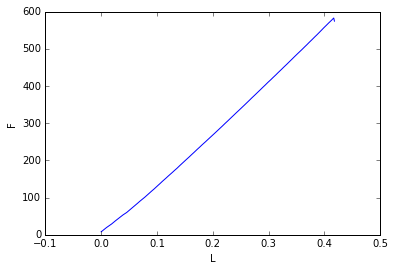

In [342]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/8.3_3__80.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [343]:
df=df.drop(df.index[(330):])
df=df.drop(df.index[:(4)])

In [344]:
df = df.assign(C_wt='81.220')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.721525 * df["F"]
df.to_csv('8.3_3__80.csv', index=False)

(322, 2)


Int64Index([1, 3, 321], dtype='int64')

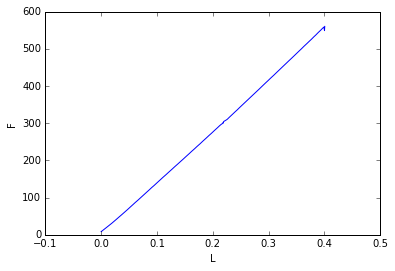

In [345]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/8.4_3__81.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [346]:
df=df.drop(df.index[(321):])
df=df.drop(df.index[:(3)])

In [347]:
df = df.assign(C_wt='78.362')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.571901 * df["F"]
df.to_csv('8.4_3__81.csv', index=False)

(312, 2)


Int64Index([1, 3, 311], dtype='int64')

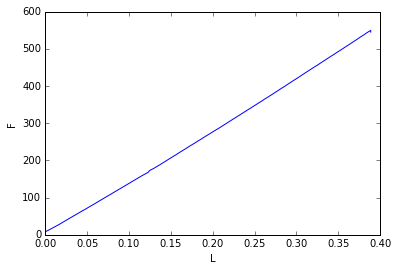

In [348]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/8.5_3__82.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [349]:
df=df.drop(df.index[(311):])
df=df.drop(df.index[:(3)])

In [350]:
df = df.assign(C_wt='80.668')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.682177 * df["F"]
df.to_csv('8.5_3__82.csv', index=False)

(314, 2)


Int64Index([1, 313], dtype='int64')

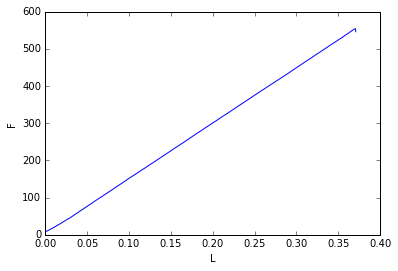

In [351]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/8.6_3__83.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [352]:
df=df.drop(df.index[(313):])
df=df.drop(df.index[:(1)])

In [353]:
df = df.assign(C_wt='80.749')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.682177 * df["F"]
df.to_csv('8.6_3__83.csv', index=False)

(270, 2)


Int64Index([1, 4], dtype='int64')

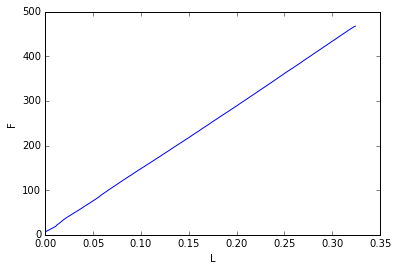

In [354]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/8.7_3__84.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [355]:
df=df.drop(df.index[:(4)])

In [356]:
df = df.assign(C_wt='81.785')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.762269 * df["F"]
df.to_csv('8.7_3__84.csv', index=False)

(310, 2)


Int64Index([2, 309], dtype='int64')

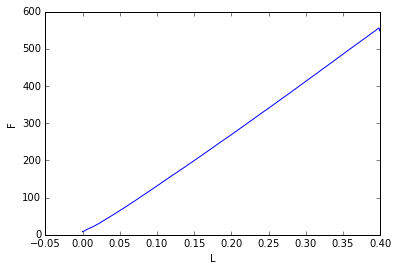

In [357]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/8.9_3__85.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [358]:
df=df.drop(df.index[(309):])
df=df.drop(df.index[:(2)])

In [359]:
df = df.assign(C_wt='78.362')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.644163 * df["F"]
df.to_csv('8.9_3__85.csv', index=False)

(303, 2)


Int64Index([3, 4, 294, 295, 296, 297], dtype='int64')

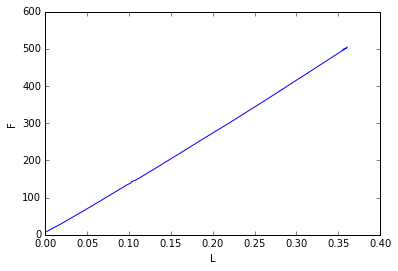

In [360]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/8.10_3__86.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [361]:
df=df.drop(df.index[(294):])
df=df.drop(df.index[:(4)])

In [362]:
df = df.assign(C_wt='83.844')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.762269 * df["F"]
df.to_csv('8.10_3__86.csv', index=False)

(183, 2)


Int64Index([3, 182], dtype='int64')

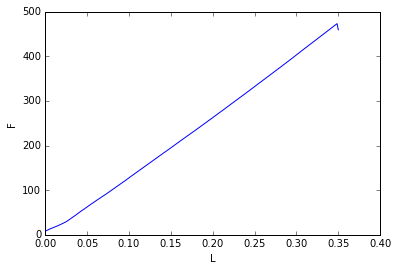

In [363]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/9.1_3__87.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [364]:
df=df.drop(df.index[(182):])
df=df.drop(df.index[:(3)])

In [365]:
df = df.assign(C_wt='79.344')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.571901 * df["F"]
df.to_csv('9.1_3__87.csv', index=False)

(208, 2)


Int64Index([2, 4], dtype='int64')

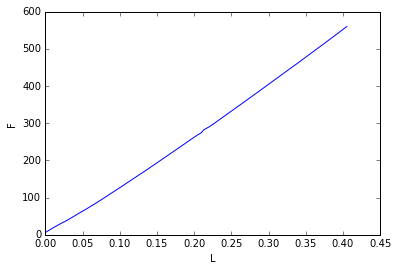

In [366]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/9.2_3__88.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [367]:
df=df.drop(df.index[:(4)])

In [368]:
df = df.assign(C_wt='83.369')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.762269 * df["F"]
df.to_csv('9.2_3__88.csv', index=False)

(228, 2)


Int64Index([1, 227], dtype='int64')

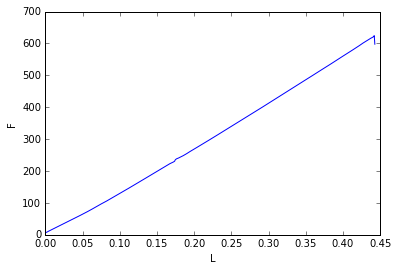

In [369]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/9.3_3__89.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [370]:
df=df.drop(df.index[(227):])
df=df.drop(df.index[:(1)])

In [371]:
df = df.assign(C_wt='80.541')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.682177 * df["F"]
df.to_csv('9.3_3__89.csv', index=False)

(200, 2)


Int64Index([1, 199], dtype='int64')

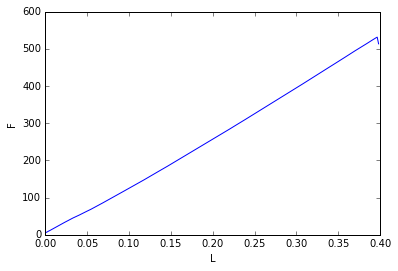

In [372]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/9.4_3__90.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [373]:
df=df.drop(df.index[(199):])
df=df.drop(df.index[:(1)])

In [374]:
df = df.assign(C_wt='85.743')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 2.263537 * df["F"]
df.to_csv('9.4_3__90.csv', index=False)

(213, 2)


Int64Index([1, 2, 212], dtype='int64')

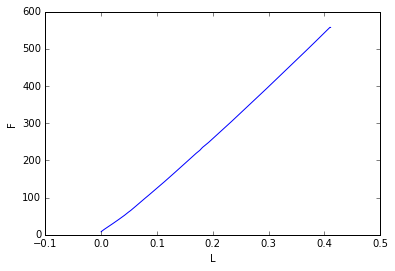

In [375]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/9.6_3__92.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [376]:
df=df.drop(df.index[(212):])
df=df.drop(df.index[:(2)])

In [377]:
df = df.assign(C_wt='75.748')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.5043 * df["F"]
df.to_csv('9.6_3__92.csv', index=False)

(161, 2)


Int64Index([1, 3], dtype='int64')

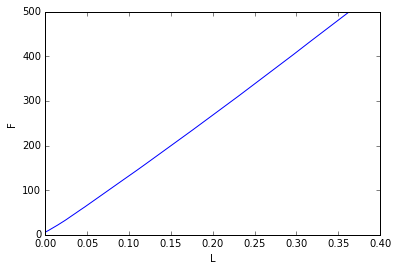

In [378]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/10.5_3__101.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [379]:
df=df.drop(df.index[:(3)])

In [380]:
df = df.assign(C_wt='82.583')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 1.940618 * df["F"]
df.to_csv('10.5_3__101.csv', index=False)

(505, 2)


Int64Index([1, 504], dtype='int64')

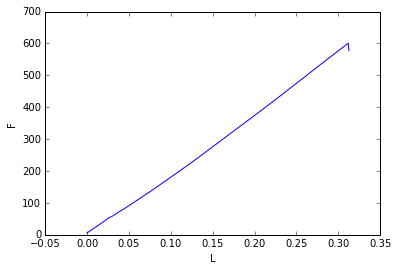

In [381]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/10-2_3__15.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [382]:
df=df.drop(df.index[(504):])
df=df.drop(df.index[:(1)])

In [383]:
df = df.assign(C_wt='83.551')
df["dL"] = 2 * df["L"]
df["Stress"] = 1.5043 * df["F"]
df.to_csv('10-2_3__15.csv', index=False)

(366, 2)


Int64Index([1, 2, 365], dtype='int64')

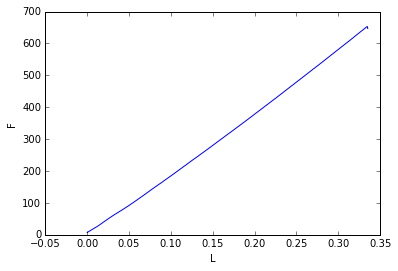

In [384]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/15-1_3__16.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [385]:
df=df.drop(df.index[(365):])
df=df.drop(df.index[:(2)])

In [386]:
df = df.assign(C_wt='84.037')
df["dL"] = 2 * df["L"]
df["Stress"] = 1.762269 * df["F"]
df.to_csv('15-1_3__16.csv', index=False)

(534, 2)


Int64Index([2, 533], dtype='int64')

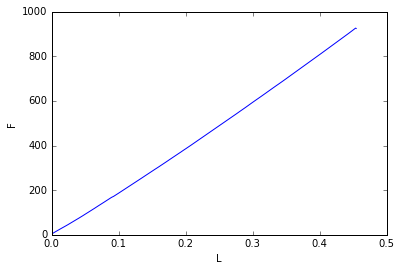

In [387]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/15-3_3__18.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [388]:
df=df.drop(df.index[(533):])
df=df.drop(df.index[:(2)])

In [389]:
df = df.assign(C_wt='73.177')
df["dL"] = 2 * df["L"]
df["Stress"] = 1.804478 * df["F"]
df.to_csv('15-3_3__18.csv', index=False)

# Предобработка результатов (серия 6)

(594, 2)


Int64Index([1, 2, 593], dtype='int64')

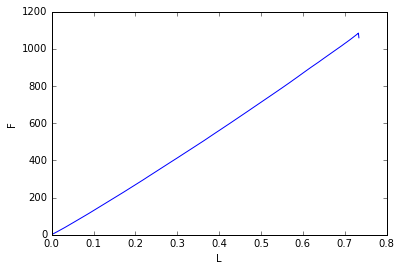

In [390]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/3.2_6__1.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [391]:
df=df.drop(df.index[(593):])
df=df.drop(df.index[:(2)])

In [392]:
df = df.assign(C_wt='78.611')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 2.25 * df["F"]
df.to_csv('3.2_6__1.csv', index=False)

(561, 2)


Int64Index([1, 4, 560], dtype='int64')

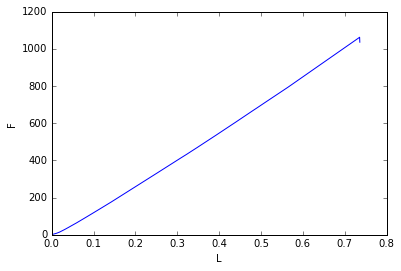

In [393]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/3.3_6__2.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [394]:
df=df.drop(df.index[(560):])
df=df.drop(df.index[:(4)])

In [395]:
df = df.assign(C_wt='82.959')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 2.25 * df["F"]
df.to_csv('3.3_6__2.csv', index=False)

(670, 2)


Int64Index([1, 3, 669], dtype='int64')

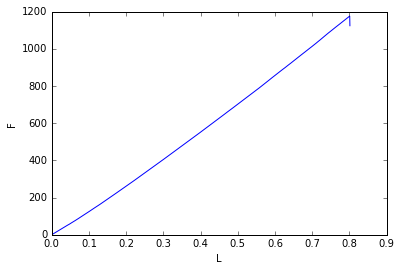

In [396]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/3.5_6__3.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [397]:
df=df.drop(df.index[(669):])
df=df.drop(df.index[:(3)])

In [398]:
df = df.assign(C_wt='83.595')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 2.25 * df["F"]
df.to_csv('3.5_6__3.csv', index=False)

(489, 2)


Int64Index([], dtype='int64')

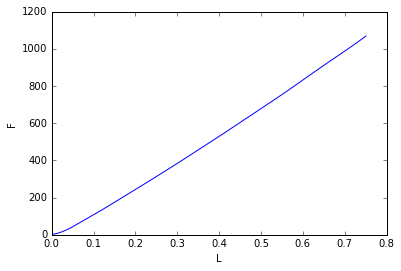

In [399]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/4.3_6__6.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [400]:
df=df.drop(df.index[(489):])
df=df.drop(df.index[:(2)])

In [401]:
df = df.assign(C_wt='84.181')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 2.25 * df["F"]
df.to_csv('4.3_6__6.csv', index=False)

(439, 2)


Int64Index([1], dtype='int64')

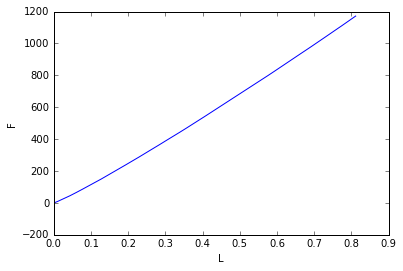

In [402]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/4.5_6__7.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [403]:
df=df.drop(df.index[(439):])
df=df.drop(df.index[:(2)])

In [404]:
df = df.assign(C_wt='84.686')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 2.25 * df["F"]
df.to_csv('4.5_6__7.csv', index=False)

(472, 2)


Int64Index([1, 2, 471], dtype='int64')

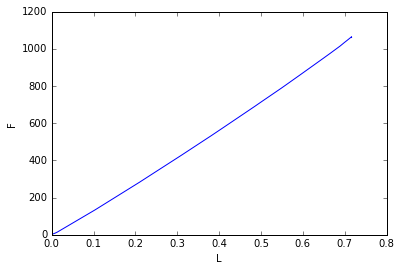

In [405]:
df = pd.read_excel(r"/Users/aljosha/RAWdata/4.13_6__8.xls",
                   sheet_name = 2,
                   skiprows=2,
                   usecols='A:B')
df.columns = ['L', 'F']
sns.lineplot(data=df, x="L", y="F")
print (df.shape)
df['F_diff'] = df['F'].diff ()
df.query('F_diff <0').index

In [406]:
df=df.drop(df.index[(471):])
df=df.drop(df.index[:(2)])

In [407]:
df = df.assign(C_wt='81.633')
df["dL"] = 1.42857 * df["L"]
df["Stress"] = 2.25 * df["F"]
df.to_csv('4.13_6__8.csv', index=False)

### Объединим все предобработанные файлы с результами в один датафрейм

In [428]:
# Соберем все предобработанные файлы в папке CSV_preprocessed
import os
list_of_csv = os.listdir('/Users/aljosha/CSV_preprocessed')

In [429]:
# Создадим датафрейм df_cnc, в который поочередно запишем данные, содержащиеся в каждом файле csv.
# Следуем по списку list_of_csv, читаем файл и записываем его в созданный DataFrame.
# Воспользуемся конкатенацией
os.chdir("/Users/aljosha/CSV_preprocessed")
df_cnc = pd.concat(map(pd.read_csv, list_of_csv), ignore_index=True, sort=False, axis=0)

In [430]:
# Размерность получившегося датафрейма
df_cnc.shape

(49622, 9)

In [431]:
# Выведем названия колонок
list(df_cnc)

['Unnamed: 0',
 'L',
 'F',
 'F_diff',
 'C_wt',
 'dL',
 'Stress',
 'Unnamed: 6',
 'L_diff']

In [432]:
# Определим список имен всех столбцов, которые собираемся удалить. 
# Затем вызовем функцию drop(), передавая параметр оси=1 - ищем значение в столбцах объекта. 
# Посмотрим размерность
to_drop = ['Unnamed: 0',
'Unnamed: 6',
'L_diff']
df_cnc.drop(to_drop, inplace=True, axis=1)
df_cnc.shape

(49622, 6)

In [433]:
# Посмотрим первые строки датафрейма
print(df_cnc.head())

          L         F    F_diff    C_wt        dL    Stress
0  0.000003  4.331162 -0.013962  77.342  0.000006  7.121136
1  0.000006  4.338875  0.007713  77.342  0.000012  7.133818
2  0.000056  4.579232  0.240356  77.342  0.000112  7.529003
3  0.000296  4.956063  0.376831  77.342  0.000592  8.148575
4  0.000750  5.531014  0.574951  77.342  0.001500  9.093889


In [434]:
# Сохраняем получившийся БОЛЬШОЙ ДАТАСЕТ в csv, игнорируя номер позиции строк
df_cnc.to_csv('Full_Stress_df.csv', index=False)